## Install required Libraries

In [51]:
!pip install -r "requirements.txt"

## Importing Libraries

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio
import seaborn as sns

## Loading Data for Analysis

In [53]:
gdf = gpd.read_file('data/vector_data/local_unit.shp')
gdf.head()

STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...

In [54]:
gdf.info()
gdf.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_CODE  777 non-null    int32   
 1   DISTRICT    777 non-null    object  
 2   GaPa_NaPa   777 non-null    object  
 3   Type_GN     777 non-null    object  
 4   Province    777 non-null    object  
 5   geometry    777 non-null    geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 33.5+ KB


<Geographic 2D CRS: GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHE ...>
Name: NepalDD
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Everest_Bangladesh
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

## Analysis on the Data

In [55]:
# Check for missing values
print(f"missing values count is as : \n{gdf.isnull().sum()}\n")

# Get summary statistics of numerical columns
print(f"summary statistics of numerical columns: \n{gdf.describe()}")

missing values count is as : 
STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64

summary statistics of numerical columns: 
       STATE_CODE
count  777.000000
mean     3.651223
std      2.000799
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      7.000000


In [56]:
print(gdf.geom_type)


0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
772    Polygon
773    Polygon
774    Polygon
775    Polygon
776    Polygon
Length: 777, dtype: object


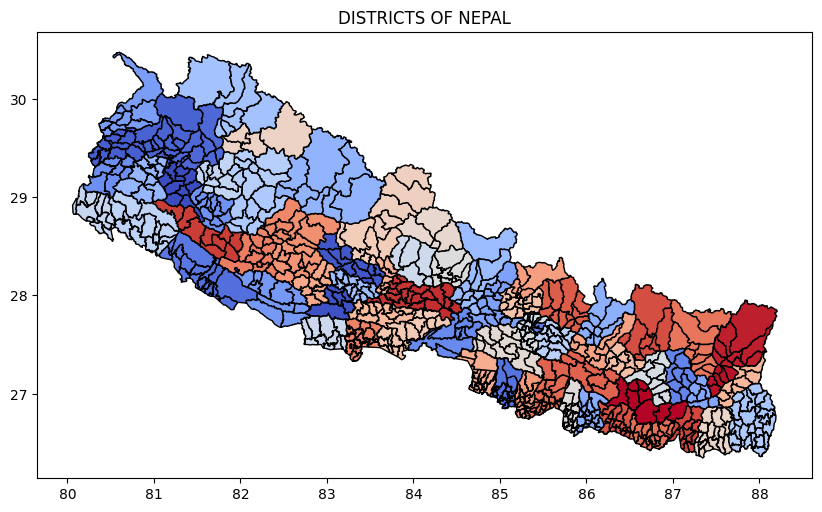

In [57]:
# On the basis of District
gdf.plot(column="DISTRICT", cmap="coolwarm", legend=False, edgecolor="black", figsize=(10,6))
plt.title("DISTRICTS OF NEPAL")
plt.show()

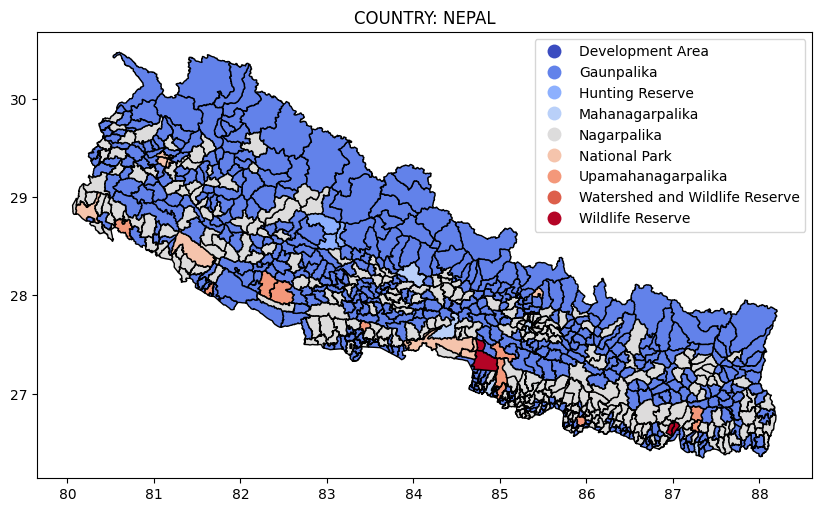

In [58]:
# Plot on the basis Type_GN
gdf.plot(column="Type_GN", cmap="coolwarm", legend=True, edgecolor="black", figsize=(10,6))
plt.title("COUNTRY: NEPAL")
plt.show()

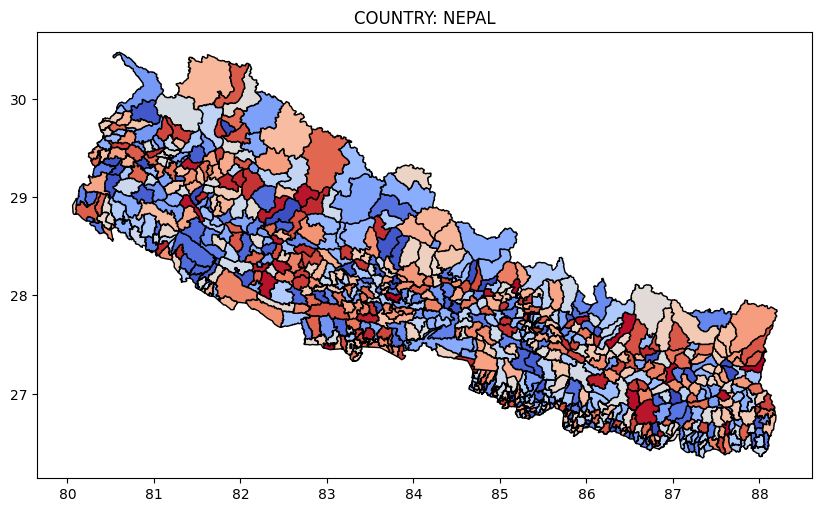

In [59]:
# Plot ON the basis of GaPa_NaPa
gdf.plot(column="GaPa_NaPa", cmap="coolwarm", legend=False, edgecolor="black", figsize=(10,6))
plt.title("COUNTRY: NEPAL")
plt.show()

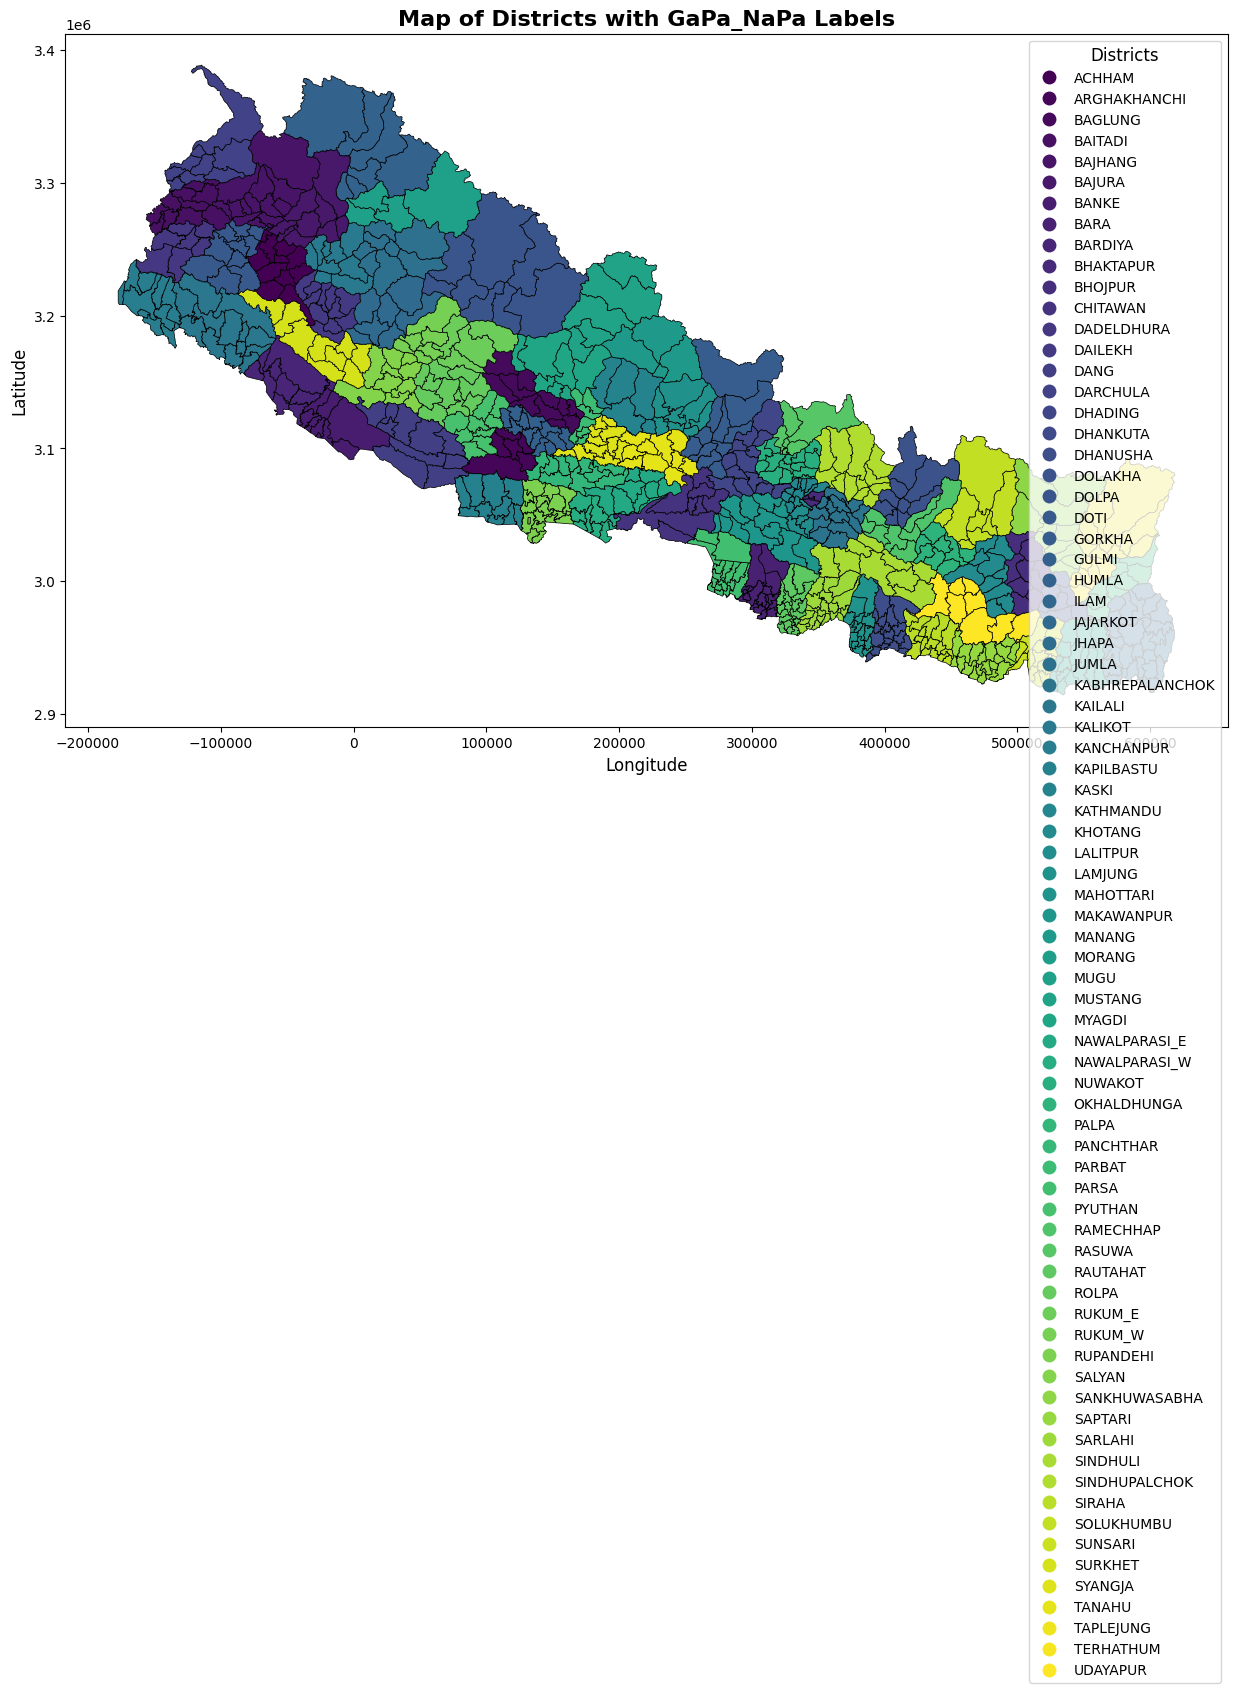

In [60]:
# to CRS
gdf = gdf.to_crs(epsg=32645)

# Plot the map with a custom color scheme
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf.plot(column='DISTRICT', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)

# Add title and labels
plt.title('Map of Districts with GaPa_NaPa Labels', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add a legend
legend = ax.get_legend()
if legend:
	legend.set_title('Districts', prop={'size': 12})

# Plotting map
plt.show()

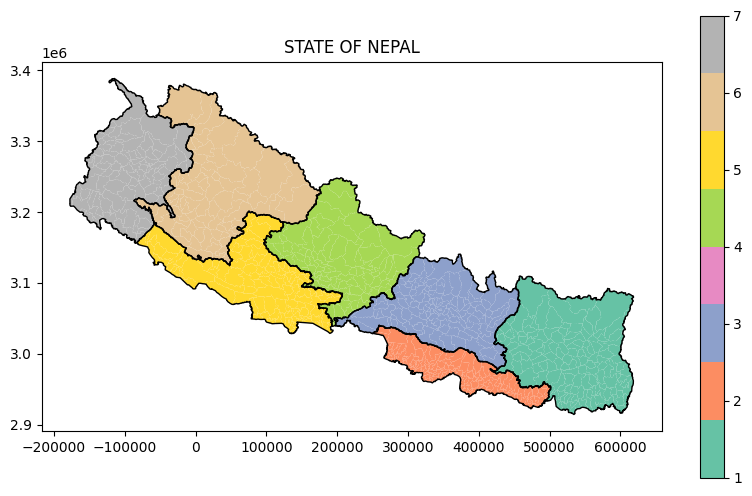

In [61]:
# Plot the states with colors but no internal boundaries
gdf.plot(column="STATE_CODE", cmap="Set2", legend= True, figsize=(10,6), edgecolor="none")

# Overlay only the state boundaries in black
gdf.dissolve(by="STATE_CODE").plot(ax=plt.gca(), color="none", edgecolor="black", linewidth=1)

plt.title("STATE OF NEPAL")
plt.show()

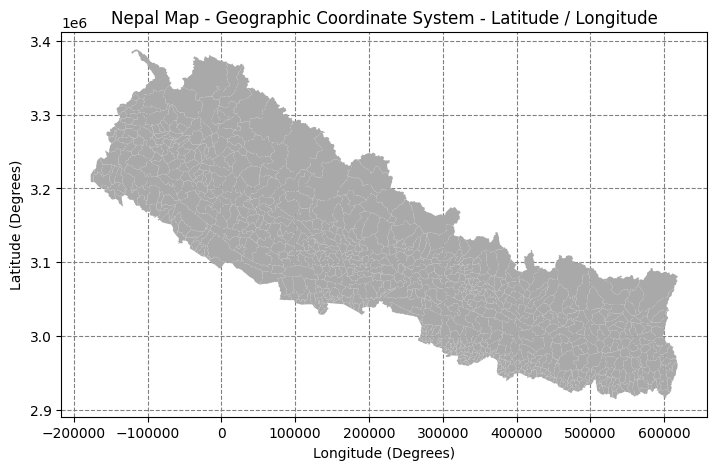

In [62]:
# Plot Nepal_data data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
gdf.plot(color='darkgrey', ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)", title="Nepal Map - Geographic Coordinate System - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

In [63]:
# Load Nepal boundary shapefile
nepal_boundary = gpd.read_file("data/vector_data/local_unit.shp")

# Load vector data (Admin regions, glaciers, rivers)
admin_regions = gpd.read_file("data/raster_data/nepal_admin_regions.gpkg")
glaciers = gpd.read_file("data/raster_data/nepal_glaciers.gpkg")
rivers = gpd.read_file("data/raster_data/nepal_rivers.gpkg")

# Load raster data (Temperature and Precipitation)
temperature_2020 = rasterio.open("data/raster_data/nepal_temperature_2020.tif")
temperature_2050 = rasterio.open("data/raster_data/nepal_temperature_2050.tif")
precipitation_2020 = rasterio.open("data/raster_data/nepal_precipitation_2020.tif")
precipitation_2050 = rasterio.open("data/raster_data/nepal_precipitation_2050.tif")

In [64]:
def get_raster_values(raster):
    if raster is None:
        return []
    array = raster.read(1).astype(float)
    array[array == raster.nodata] = np.nan  # Convert no-data values to NaN
    return array[~np.isnan(array)].flatten()  # Remove NaN and flatten

# Extract numerical values
temp_2020_values = get_raster_values(temperature_2020)
temp_2050_values = get_raster_values(temperature_2050)
precip_2020_values = get_raster_values(precipitation_2020)
precip_2050_values = get_raster_values(precipitation_2050)



def summarize_data(name, data):
    if len(data) == 0:
        print(f"{name} data unavailable.")
        return
    summary = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Min": np.min(data),
        "Max": np.max(data),
        "Std Dev": np.std(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25)
    }
    print(f"\n{name} Statistics:")
    for key, value in summary.items():
        print(f"{key}: {value:.2f}")

summarize_data("Temperature 2020", temp_2020_values)
summarize_data("Temperature 2050", temp_2050_values)
summarize_data("Precipitation 2020", precip_2020_values)
summarize_data("Precipitation 2050", precip_2050_values)


Temperature 2020 Statistics:
Mean: -7.58
Median: -7.69
Min: -23.20
Max: 8.14
Std Dev: 7.30
IQR: 12.53

Temperature 2050 Statistics:
Mean: -5.47
Median: -5.58
Min: -22.09
Max: 11.47
Std Dev: 7.16
IQR: 12.28

Precipitation 2020 Statistics:
Mean: 50.84
Median: 50.37
Min: 6.86
Max: 102.83
Std Dev: 11.39
IQR: 15.29

Precipitation 2050 Statistics:
Mean: 48.29
Median: 46.74
Min: -6.41
Max: 134.97
Std Dev: 16.39
IQR: 21.82


### **Climate Statistics Summary (2020 vs. 2050)**  

#### Temperature Trend  
- **Overall warming:** The mean temperature rises from **-7.58°C (2020) to -5.47°C (2050)**, while the median increases from **-7.69°C to -5.58°C**.  
- **Extreme temperatures:** The max temperature increases from **8.14°C to 11.47°C**, suggesting hotter days, while the min temperature rises slightly from **-23.20°C to -22.09°C**, indicating milder cold extremes.  
- **Variability:** Standard deviation decreases slightly from **7.30 to 7.16**, and the interquartile range (IQR) drops from **12.53 to 12.28**, suggesting relatively stable temperature fluctuations.  

#### Precipitation Trend  
- **Overall decrease:** Mean precipitation drops from **50.84 mm (2020) to 48.29 mm (2050)**, while the median decreases from **50.37 mm to 46.74 mm**.  
- **Extreme rainfall:** Maximum precipitation increases from **102.83 mm to 134.97 mm**, pointing to more intense rainfall events.  
- **Potential dryness:** The minimum precipitation drops from **6.86 mm to -6.41 mm**, indicating possible drier conditions in some areas.  
- **Greater variability:** Standard deviation increases from **11.39 to 16.39**, and IQR expands from **15.29 to 21.82**, suggesting more unpredictable rainfall patterns.  

##Temperature Trend Over Time in Nepal

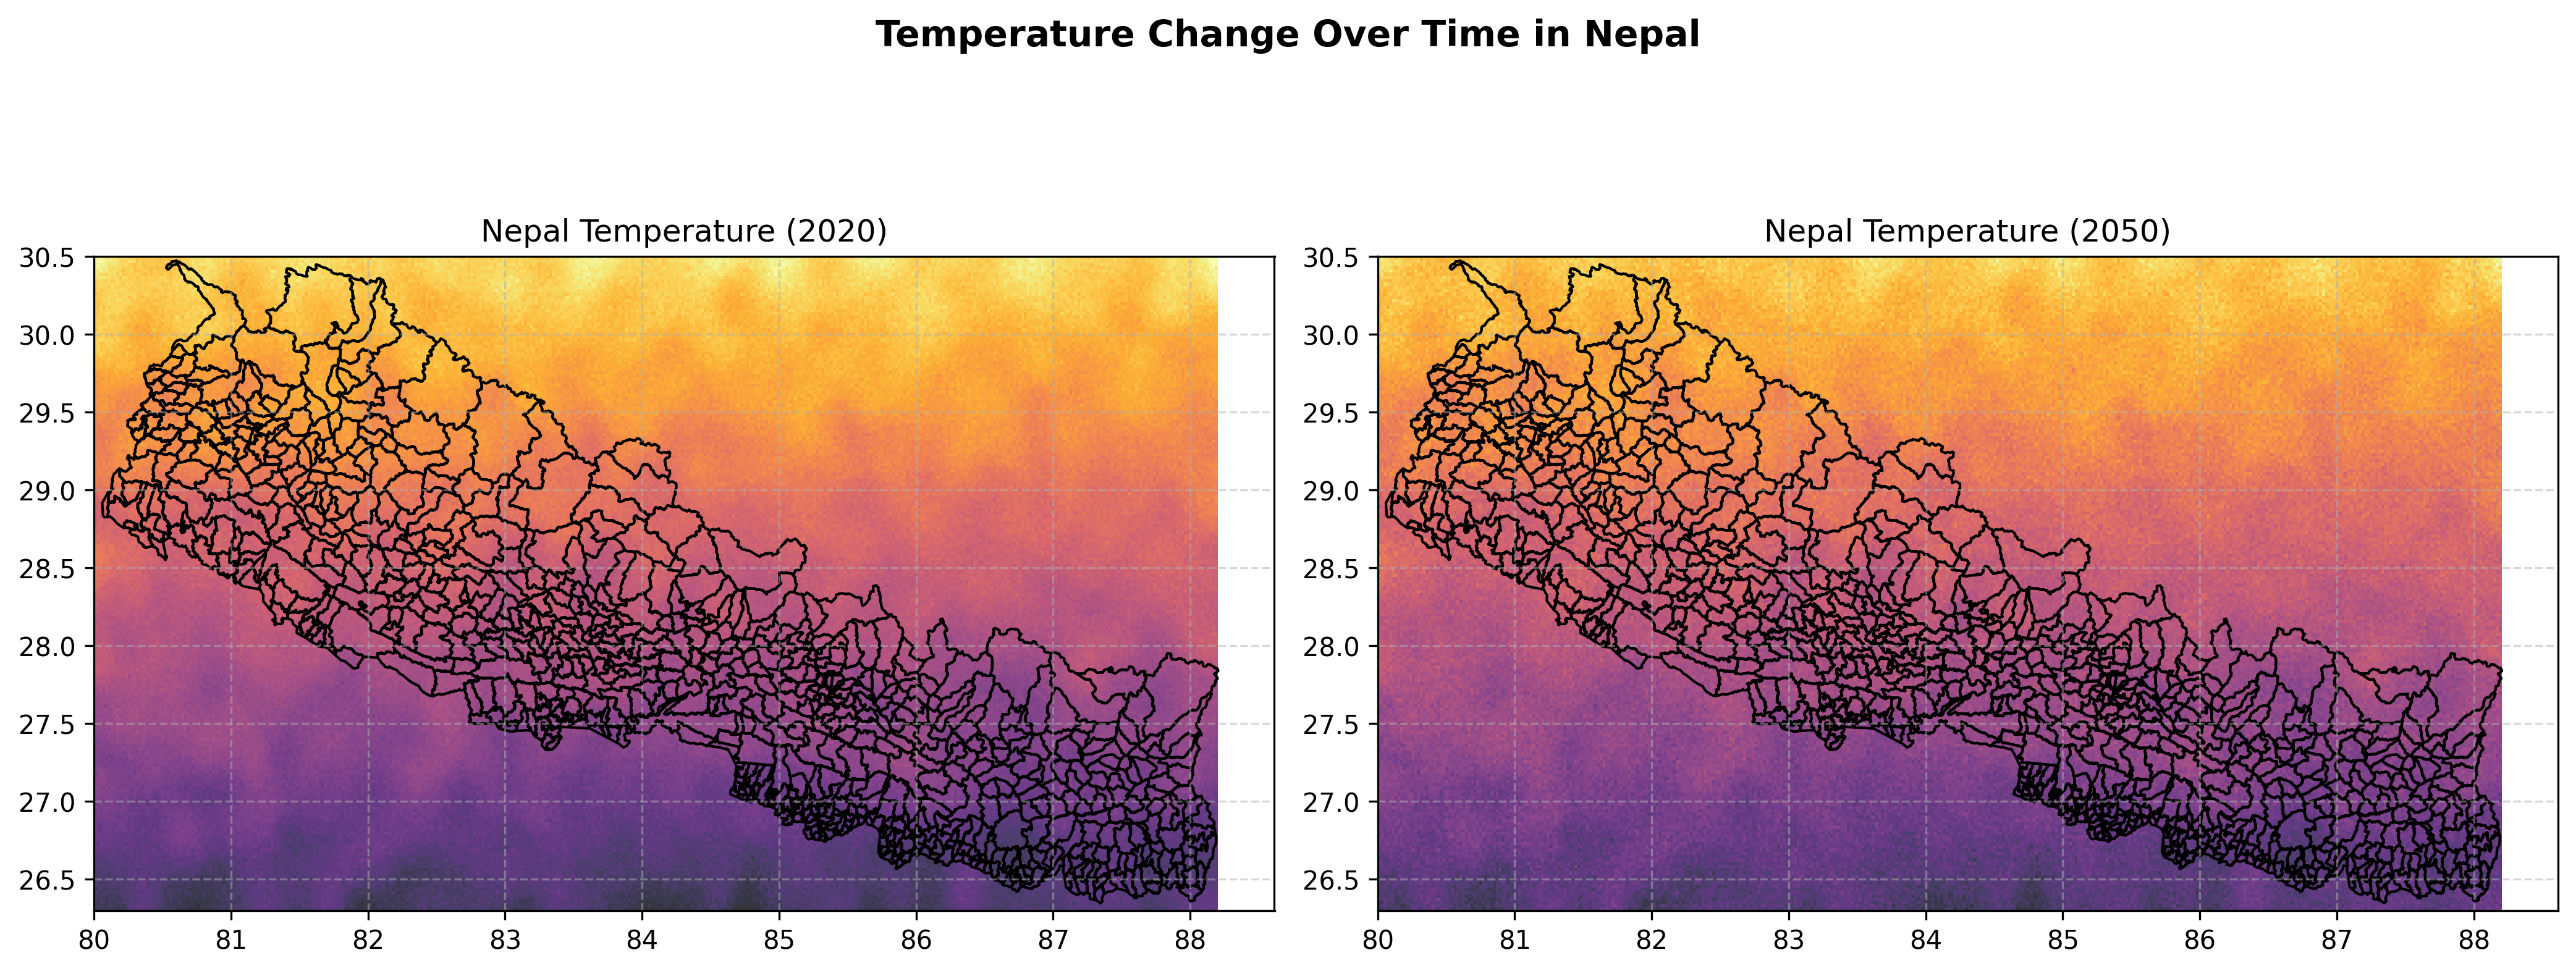

In [65]:
from rasterio.plot import show

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

for i, (raster, title, ax) in enumerate(zip([temperature_2020, temperature_2050], ["Nepal Temperature (2020)", "Nepal Temperature (2050)"], axes)):
    if raster:
        show(raster, ax=ax, cmap="inferno", alpha=0.8)
        if nepal_boundary is not None:
            nepal_boundary.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
        ax.set_title(title, fontsize=12)
        ax.grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Temperature Change Over Time in Nepal", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

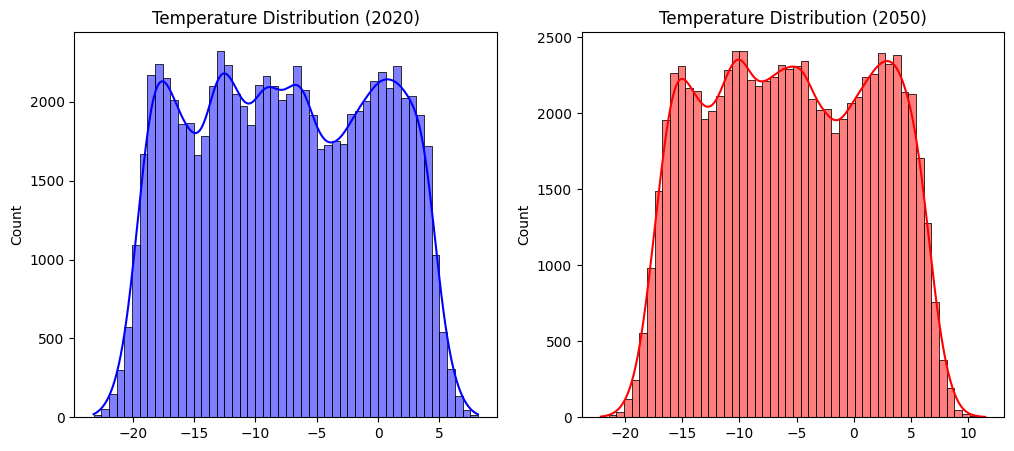

In [66]:
# Function to read and clean raster data
def read_raster(filepath):
    with rasterio.open(filepath) as dataset:
        data = dataset.read(1)  # Read the first band
        data = np.where(data == dataset.nodata, np.nan, data)  # Convert nodata values to NaN
    return data

# Load the raster data properly
temperature_2020 = read_raster("data/raster_data/nepal_temperature_2020.tif")
temperature_2050 = read_raster("data/raster_data/nepal_temperature_2050.tif")

# Function to flatten and remove NaNs
def clean_data(data):
    return data[~np.isnan(data)].flatten()

# Cleaned temperature data
temp_2020 = clean_data(temperature_2020)
temp_2050 = clean_data(temperature_2050)

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 2020 temperature
sns.histplot(temp_2020, bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Temperature Distribution (2020)")

# Plot histogram for 2050 temperature
sns.histplot(temp_2050, bins=50, kde=True, color="red", ax=axes[1])
axes[1].set_title("Temperature Distribution (2050)")

# Show plot
plt.show()

### Observations from the Temperature Distribution  

#### **Shift Towards Warmer Temperatures**  
Comparing the temperature distribution in 2020 and 2050, we can see a noticeable shift towards higher temperatures. This suggests that Nepal is experiencing a warming trend over time.  

#### **Increase in Temperature Variability**  
The range of temperatures in 2050 is slightly broader than in 2020, meaning there could be more extreme temperature events in the future. This could lead to hotter days and possibly more unpredictable weather patterns.  

#### **Changes in Temperature Density**  
While the peak temperature values remain somewhat similar, the distribution for 2050 appears slightly flatter in some areas. This might indicate greater temperature fluctuations, leading to less stability in overall climate conditions.  



## Precipitation Trend in Nepal

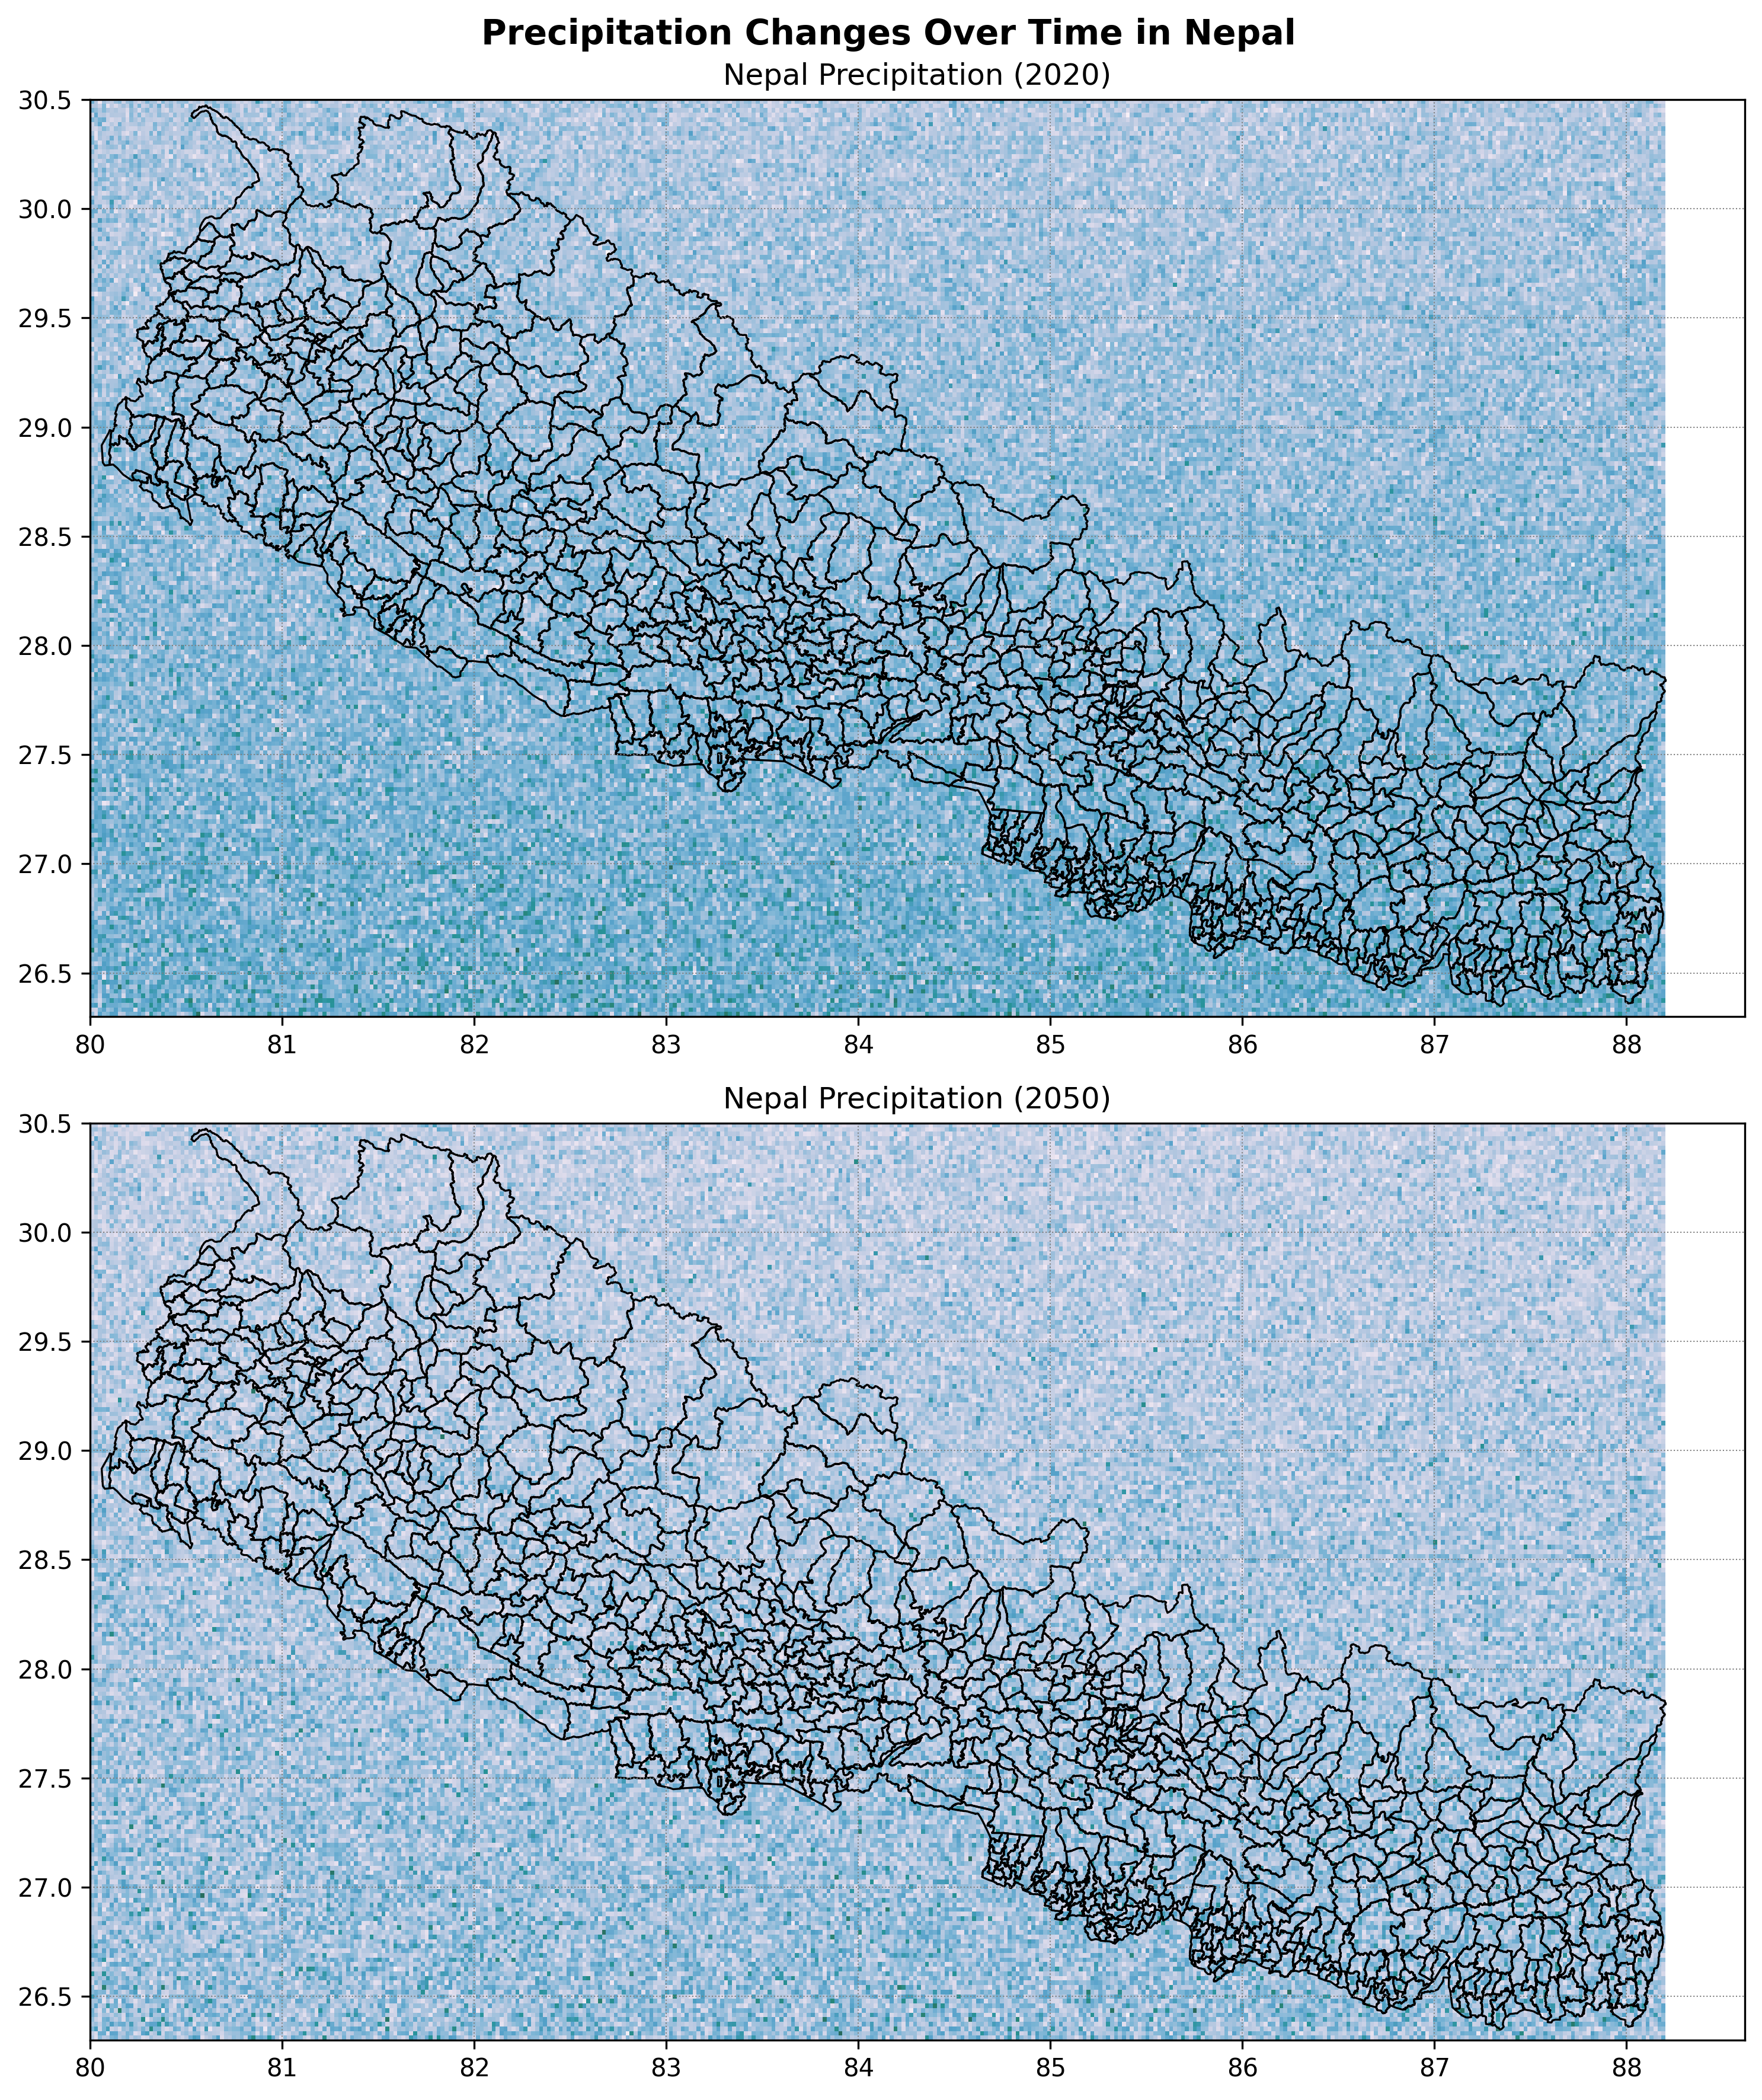

In [67]:
# Precipitation Trend in Nepal

fig, axes = plt.subplots(2, 1, figsize=(10, 12), dpi=300)

for i, (raster, title, ax) in enumerate(zip([precipitation_2020, precipitation_2050],
                                            ["Nepal Precipitation (2020)", "Nepal Precipitation (2050)"],
                                            axes)):
    if raster:
        rasterio.plot.show(raster, ax=ax, cmap="PuBuGn", alpha=0.85)
        if nepal_boundary is not None:
            nepal_boundary.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
        ax.set_title(title, fontsize=12)
        ax.grid(color="gray", linestyle="dotted", linewidth=0.5)

plt.suptitle("Precipitation Changes Over Time in Nepal", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


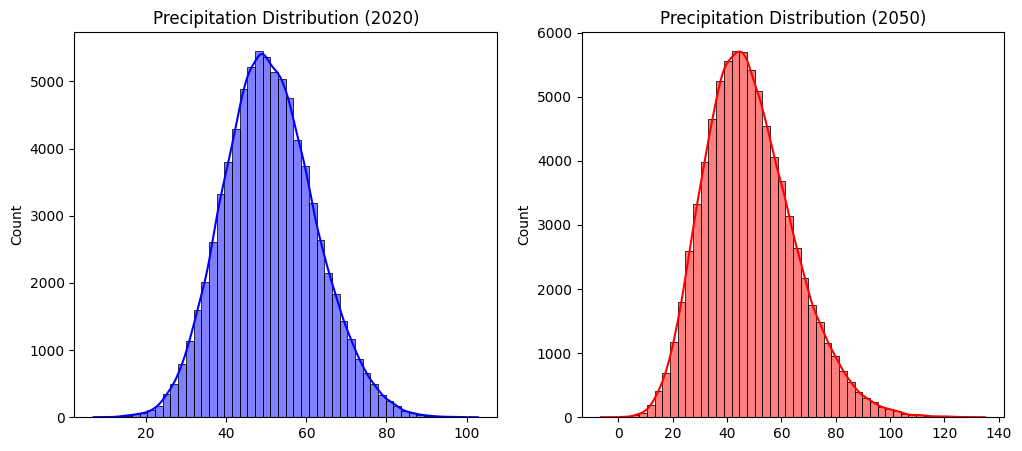

In [68]:
# Function to read and clean raster data
def read_raster(filepath):
    with rasterio.open(filepath) as dataset:
        data = dataset.read(1)  # Read the first band
        data = np.where(data == dataset.nodata, np.nan, data)  # Convert nodata values to NaN
    return data

# Load the raster data properly
precipitation_2020 = read_raster("data/raster_data/nepal_precipitation_2020.tif")
precipitation_2050 = read_raster("data/raster_data/nepal_precipitation_2050.tif")

# Function to flatten and remove NaNs
def clean_data(data):
    return data[~np.isnan(data)].flatten()

# Cleaned temperature data
temp_2020 = clean_data(precipitation_2020)
temp_2050 = clean_data(precipitation_2050)

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 2020 temperature
sns.histplot(temp_2020, bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Precipitation Distribution (2020)")

# Plot histogram for 2050 temperature
sns.histplot(temp_2050, bins=50, kde=True, color="red", ax=axes[1])
axes[1].set_title("Precipitation Distribution (2050)")

# Show plot
plt.show()

### Observations from the Precipitation Distribution

#### Shift in Precipitation Patterns

Comparing the precipitation distributions of 2020 and 2050, we can see a noticeable shift. The peak remains similar, but the 2050 distribution extends further towards higher values, suggesting potential increases in extreme rainfall events.

#### Increase in Variability

The spread of precipitation values appears broader in 2050, indicating greater fluctuations. This suggests that Nepal might experience more variability in rainfall, with possible periods of heavy downpours and extended dry spells.

#### Changes in Distribution Shape

While the general pattern remains similar, the precipitation distribution in 2050 seems slightly flatter in some areas, meaning rainfall amounts could be less predictable and more extreme.